# Classification on Titanic Dataset

### 1)Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2)Importing Dataset

In [2]:
df = pd.read_csv('test_s.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley\r(Florence Briggs T...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.\r3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath\r(Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3)Data Preprocessing

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,876.000000,876.000000,876.000000,701.000000,876.000000,876.000000,876.000000
mean,445.929224,0.384703,2.304795,29.719215,0.528539,0.385845,32.391794
std,257.600137,0.486803,0.836059,14.583577,1.110102,0.809645,50.020501
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.917700
50%,446.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.250000,1.000000,3.000000,38.000000,1.000000,0.000000,31.068750
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  876 non-null    int64  
 1   Survived     876 non-null    int64  
 2   Pclass       876 non-null    int64  
 3   Name         876 non-null    object 
 4   Sex          876 non-null    object 
 5   Age          701 non-null    float64
 6   SibSp        876 non-null    int64  
 7   Parch        876 non-null    int64  
 8   Ticket       876 non-null    object 
 9   Fare         876 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     874 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 82.2+ KB


In [5]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2.\r3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
869,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ\r392076,7.0500,NaN,S
870,886,0,3,"Rice, Mrs. William (Margaret\rNorton)",female,39.0,0,5,382652,29.1250,NaN,Q
871,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
873,889,0,3,"Johnston, Miss. Catherine Helen\r""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df.isnull().values.any()

True

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            175
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          674
Embarked         2
dtype: int64

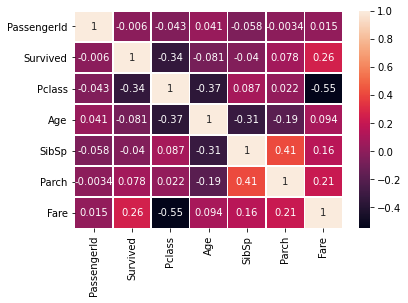

In [8]:
sns.heatmap(df.corr(), annot=True, linewidth = 0.5)

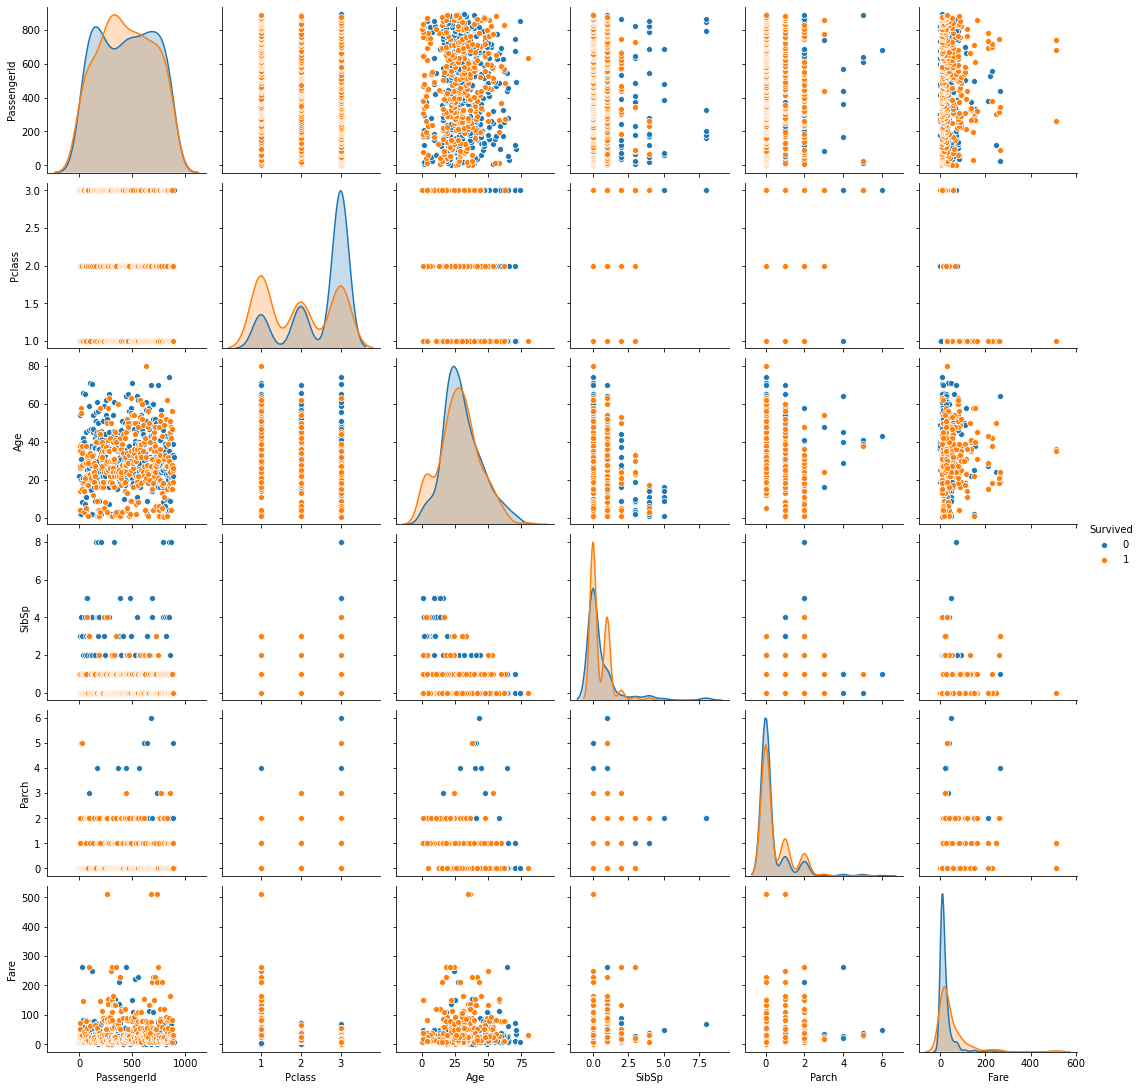

In [9]:
sns.pairplot(df,hue = 'Survived',dropna = True)

In [10]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],axis = 1,inplace = True)

In [11]:
df = df.dropna(subset =['Embarked', 'Age'])

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.isnull().values.any()

False

In [14]:
IQR_Age = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print(IQR_Age)
Upper_OutlierLimit_Age = df['Age'].quantile(0.75) + 1.5*IQR_Age
Lower_OutlierLimit_Age = df['Age'].quantile(0.25) - 1.5*IQR_Age
print(Upper_OutlierLimit_Age)
print(Lower_OutlierLimit_Age)
OutlierValues_Age = df[(df['Age']>=Upper_OutlierLimit_Age) | (df[
'Age']<=Lower_OutlierLimit_Age)]
OutlierValues_Age

18.0
65.0
-7.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
33,0,2,male,66.0,0,0,10.5000,S
53,0,1,male,65.0,0,1,61.9792,C
95,0,1,male,71.0,0,0,34.6542,C
114,0,3,male,70.5,0,0,7.7500,Q
276,0,3,male,65.0,0,0,7.7500,Q
448,0,1,male,65.0,0,0,26.5500,S
485,0,1,male,71.0,0,0,49.5042,C
619,1,1,male,80.0,0,0,30.0000,S
661,0,2,male,70.0,0,0,10.5000,S
732,0,1,male,70.0,1,1,71.0000,S


In [15]:
df.loc[df.Age > 54.5,'Age'] =  df['Age'].quantile(0.95)
df.loc[df.Age < 2.5,'Age'] =  df['Age'].quantile(0.05)

In [16]:
IQR_Fare = df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25)
print(IQR_Fare)
Upper_OutlierLimit_Fare = df['Fare'].quantile(0.75) + 1.5*IQR_Fare
Lower_OutlierLimit_Fare = df['Fare'].quantile(0.25) - 1.5*IQR_Fare
print(Upper_OutlierLimit_Fare)
print(Lower_OutlierLimit_Fare)
OutlierValues_Fare = df[(df['Fare']>=Upper_OutlierLimit_Fare) | (df[
'Fare']<=Lower_OutlierLimit_Fare)]
OutlierValues_Fare

24.95
70.425
-29.374999999999996


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
27,0,1,male,19.0,3,2,263.0000,S
34,0,1,male,28.0,1,0,82.1708,C
61,0,1,male,45.0,1,0,83.4750,S
71,0,2,male,21.0,0,0,73.5000,S
...,...,...,...,...,...,...,...,...
788,1,1,male,11.0,1,2,120.0000,S
806,1,1,female,52.0,1,1,93.5000,S
821,1,1,female,39.0,1,1,83.1583,C
841,1,1,female,45.0,1,1,164.8667,S


In [17]:
df.loc[df.Fare > 65.795325,'Fare'] =  df['Fare'].quantile(0.95)
df.loc[df.Fare < -26.808875000000004,'Fare'] =  df['Fare'].quantile(0.05)

In [18]:
obj = df.dtypes == np.object
df.columns[obj]

Index(['Sex', 'Embarked'], dtype='object')

In [19]:
dummydf = pd.DataFrame()
for i in df.columns[obj]:
    dummy = pd.get_dummies(df[i], drop_first=True)
    dummydf = pd.concat([dummydf, dummy], axis=1) 
    
    
print(dummydf)

     male  Q  S
0       1  0  1
1       0  0  0
2       0  0  1
3       0  0  1
4       1  0  1
..    ... .. ..
870     0  1  0
871     1  0  1
872     0  0  1
874     1  0  0
875     1  1  0

[699 rows x 3 columns]


In [20]:
df = pd.concat([df,dummydf], axis=1)

In [21]:
dataset = df[['Pclass','Age','SibSp','Parch','Fare','male','Q','S','Survived']]

In [22]:
dataset.head(10)

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived
0,3,22.0,1,0,7.2500,1,0,1,0
1,1,38.0,1,0,120.0000,0,0,0,1
2,3,26.0,0,0,7.9250,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,1,0
6,1,54.0,0,0,51.8625,1,0,1,0
7,3,4.0,3,1,21.0750,1,0,1,0
8,3,27.0,0,2,11.1333,0,0,1,1
9,2,14.0,1,0,30.0708,0,0,0,1
10,3,4.0,1,1,16.7000,0,0,1,1


In [23]:
dataset.shape

(699, 9)

### 4)Creating X and Y variables

In [24]:
X = dataset.iloc[:,:-1].values
X

array([[ 3., 22.,  1., ...,  1.,  0.,  1.],
       [ 1., 38.,  1., ...,  0.,  0.,  0.],
       [ 3., 26.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 1., 19.,  0., ...,  0.,  0.,  1.],
       [ 1., 26.,  0., ...,  1.,  0.,  0.],
       [ 3., 32.,  0., ...,  1.,  1.,  0.]])

In [25]:
y = dataset.iloc[:,-1].values
y

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,

### 5)Splitting into Train & Test Data

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [27]:
X_train

array([[ 3.,  3.,  3., ...,  0.,  0.,  1.],
       [ 2., 17.,  0., ...,  0.,  0.,  1.],
       [ 2., 56.,  0., ...,  1.,  1.,  0.],
       ...,
       [ 3., 31.,  0., ...,  1.,  0.,  1.],
       [ 2., 27.,  0., ...,  0.,  0.,  1.],
       [ 2., 28.,  1., ...,  0.,  0.,  0.]])

In [28]:
y_train

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,

In [29]:
X_test

array([[ 3., 26.,  1., ...,  0.,  0.,  1.],
       [ 2., 25.,  1., ...,  1.,  0.,  0.],
       [ 2., 21.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 3., 18.,  0., ...,  1.,  0.,  1.],
       [ 1., 27.,  0., ...,  1.,  0.,  1.],
       [ 1., 45.,  1., ...,  1.,  0.,  1.]])

In [30]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [31]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [32]:
X_train

array([[ 0.89943714, -1.92529953,  2.7498332 , ..., -1.35556758,
        -0.21180135,  0.52837127],
       [-0.29482738, -0.90840042, -0.55825165, ..., -1.35556758,
        -0.21180135,  0.52837127],
       [-0.29482738,  1.92438996, -0.55825165, ...,  0.73769838,
         4.72140516, -1.89260857],
       ...,
       [ 0.89943714,  0.10849869, -0.55825165, ...,  0.73769838,
        -0.21180135,  0.52837127],
       [-0.29482738, -0.18204391, -0.55825165, ..., -1.35556758,
        -0.21180135,  0.52837127],
       [-0.29482738, -0.10940826,  0.5444433 , ..., -1.35556758,
        -0.21180135, -1.89260857]])

In [33]:
X_test

array([[ 0.89943714, -0.25467956,  0.5444433 , ..., -1.35556758,
        -0.21180135,  0.52837127],
       [-0.29482738, -0.32731521,  0.5444433 , ...,  0.73769838,
        -0.21180135, -1.89260857],
       [-0.29482738, -0.61785782, -0.55825165, ..., -1.35556758,
        -0.21180135,  0.52837127],
       ...,
       [ 0.89943714, -0.83576477, -0.55825165, ...,  0.73769838,
        -0.21180135,  0.52837127],
       [-1.4890919 , -0.18204391, -0.55825165, ...,  0.73769838,
        -0.21180135,  0.52837127],
       [-1.4890919 ,  1.1253978 ,  0.5444433 , ...,  0.73769838,
        -0.21180135,  0.52837127]])

### 6)Building the Model and Testing Accuracy

#### a)Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [36]:
y_test

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [37]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[69  7]
 [15 49]]


In [38]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8428571428571429

##### Accuracy of Logistic Regression Model:  0.8428571428571429

#### b)K Nearest Neighbours Classification

In [39]:
from sklearn.neighbors import KNeighborsClassifier
error = []
accuracy = []

# Calculating error for K values between 1 and 40
for i in range(1,40,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    accuracy.append(metrics.accuracy_score(y_test, pred_i))

Text(0, 0.5, 'Mean Error')

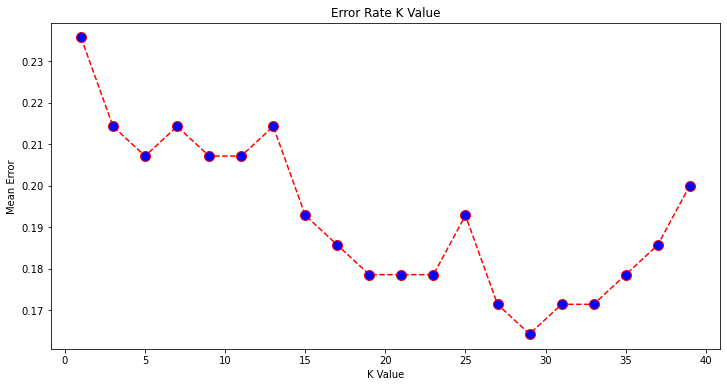

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Text(0, 0.5, 'Accuracy')

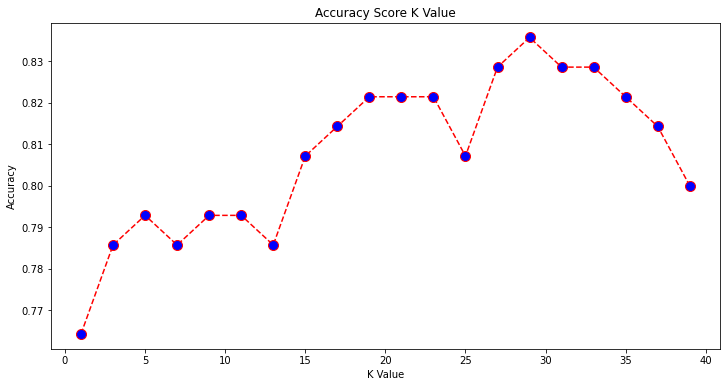

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,40,2), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy Score K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [42]:

knn = KNeighborsClassifier(n_neighbors = 30, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [43]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

In [44]:
confusion_matrix(y_test, y_pred)

array([[69,  7],
       [18, 46]], dtype=int64)

In [45]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        76
           1       0.87      0.72      0.79        64

    accuracy                           0.82       140
   macro avg       0.83      0.81      0.82       140
weighted avg       0.83      0.82      0.82       140



In [46]:
metrics.accuracy_score(y_test, y_pred)

0.8214285714285714

##### Accuracy of KNN Classification Model:  0.8214285714285714

#### c)Decision Tree Classifier

In [47]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [48]:
confusion_matrix(y_test, y_pred)

array([[65, 11],
       [18, 46]], dtype=int64)

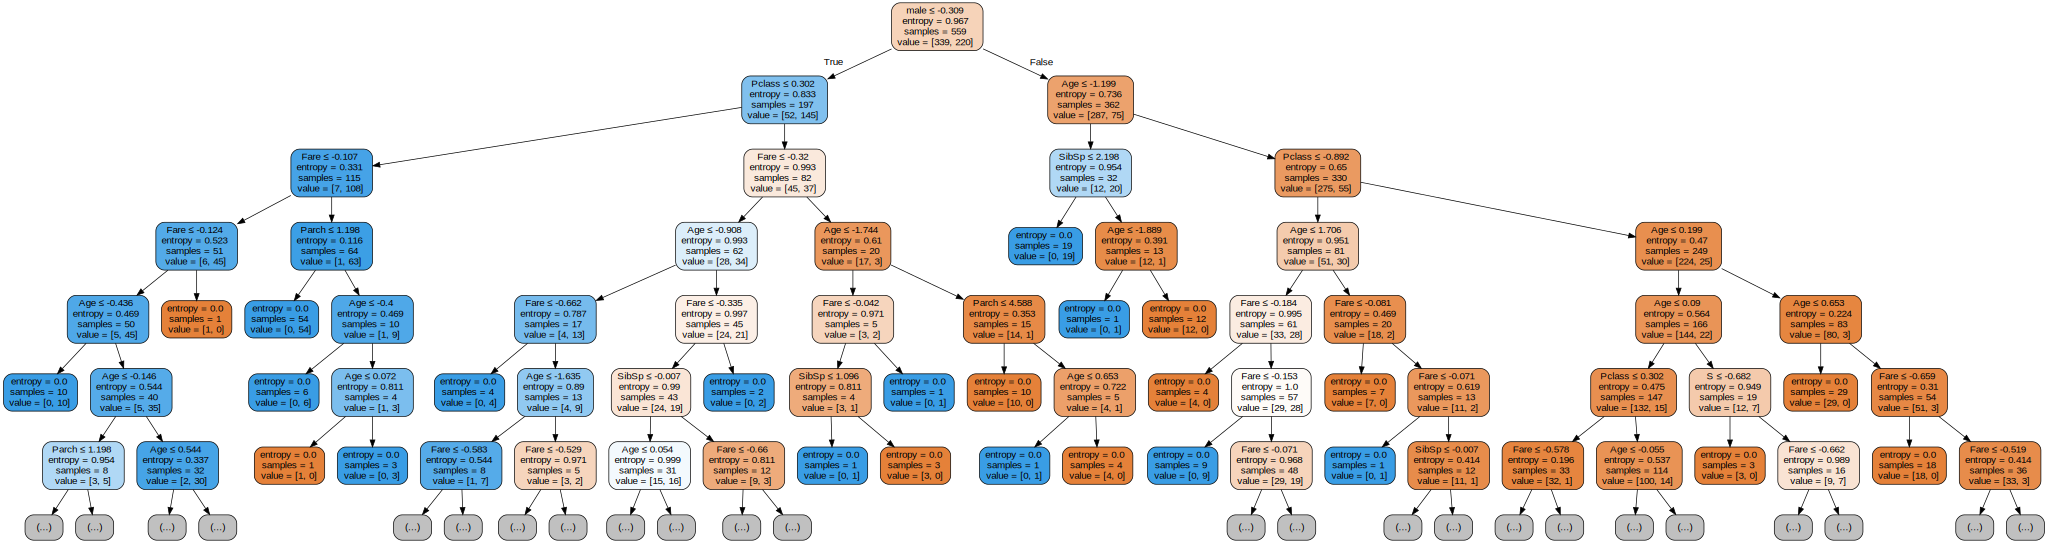

In [49]:
import graphviz 
from sklearn import tree
from PIL import Image
dot_data = tree.export_graphviz(clf, 
                                out_file=None,
                                filled=True, 
                                rounded=True, 
                                max_depth = 6,
                                special_characters=True,
                               feature_names = ['Pclass','Age','SibSp','Parch','Fare','male','Q','S']) 
graph = graphviz.Source(dot_data,format = "png")
graph.render('sample', view=True) 
graph

In [50]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        76
           1       0.81      0.72      0.76        64

    accuracy                           0.79       140
   macro avg       0.80      0.79      0.79       140
weighted avg       0.79      0.79      0.79       140



In [51]:
metrics.accuracy_score(y_test, y_pred)

0.7928571428571428

##### Accuracy of Decision Tree Classification Model:  0.7928571428571428

#### d)Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [53]:
confusion_matrix(y_test, y_pred)

array([[62, 14],
       [19, 45]], dtype=int64)

In [54]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        76
           1       0.76      0.70      0.73        64

    accuracy                           0.76       140
   macro avg       0.76      0.76      0.76       140
weighted avg       0.76      0.76      0.76       140



In [55]:
metrics.accuracy_score(y_test, y_pred)

0.7642857142857142

##### Accuracy of Random Forest Classification Model:  0.7642857142857142

### CONCLUSION:

#### From the above observations,it is obvious that Logistic Regression performs well on the titanic dataset model and gives the highest accuracy of 84%.So,LOGISTIC REGRESSION IS THE BEST MODEL